In [46]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd# data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [47]:
import socket, warnings
try:
    socket.setdefaulttimeout(1)
    socket.socket(socket.AF_INET, socket.SOCK_STREAM).connect(("1.1.1.1", 53))
except socket.error as ex: raise Exception("STOP")

In [7]:
import os
iskaggle = os.environ.get('KAGGLE_KERNEL_RUN_TYPE', '')

if iskaggle:
    !pip install -Uqq fastai duckduckgo_search

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
dask-cudf 21.10.1 requires cupy-cuda114, which is not installed.
ray 2.0.0 requires click<=8.0.4,>=7.0, but you have click 8.1.3 which is incompatible.
dask-cudf 21.10.1 requires dask==2021.09.1, but you have dask 2022.2.0 which is incompatible.
dask-cudf 21.10.1 requires distributed==2021.09.1, but you have distributed 2022.2.0 which is incompatible.
allennlp 2.10.0 requires protobuf==3.20.0, but you have protobuf 3.19.4 which is incompatible.


In [8]:
! pip install fastbook
! [ -e /content ] && pip install -Uqq fastbook

In [9]:
import fastbook
fastbook.setup_book()

In [10]:
#hide
from fastbook import *
from fastai.vision.widgets import *

In [11]:
search_images_ddg

<function fastbook.search_images_ddg(term, max_images=200)>

In [13]:
searches = 'moose', 'deer', 'elk'
path = Path('trail_cam')
from time import sleep

In [14]:
for o in searches:
    dest = (path/o)
    dest.mkdir(exist_ok=True, parents=True)
    download_images(dest, urls = search_images_ddg(f'{o} photo'))
    sleep(10)
    resize_images(path/o, max_size=400, dest=path/o)

In [15]:
fns = get_image_files(path)
fns

(#589) [Path('trail_cam/deer/407db4e7-ab39-4727-8e28-4ee719f4b6c0.jpeg'),Path('trail_cam/deer/24150ccb-f7ad-437c-bc62-c9d68abb7ea1.jpg'),Path('trail_cam/deer/3a3143b0-11e9-4b3e-8b04-97640ab9aa3c.jpeg'),Path('trail_cam/deer/819cccdd-3d49-4857-87bd-26e0d10c464d.jpg'),Path('trail_cam/deer/f518429d-6915-41a5-9cd2-cc1b12ddc6b0.jpg'),Path('trail_cam/deer/34e4dd2c-8c5e-4129-b45e-7c6084edfc04.jpg'),Path('trail_cam/deer/02027bc7-75b3-4ac4-a4b4-f929ce84d814.jpg'),Path('trail_cam/deer/6720fcc0-4180-4d72-a156-c664226f89d3.jpg'),Path('trail_cam/deer/46de28fe-580f-4d9c-9ccc-5819e00d2b3f.jpg'),Path('trail_cam/deer/ec3151d4-e555-4f2e-87ea-1b46e52516b6.jpg')...]

In [16]:
failed = verify_images(fns)
failed.map(Path.unlink)

len(failed)

7

In [28]:
# DUPLICATE DATA LOADER METHOD
from PIL import Image

deers = DataBlock(
    blocks=(ImageBlock, CategoryBlock),
    get_items=get_image_files,
    splitter=RandomSplitter(valid_pct = 0.2 , seed = 42),
    get_y=parent_label,
    item_tfms=Resize(460),
    batch_tfms=aug_transforms(size=224, min_scale=0.75)
)


dls = deers.dataloaders(path)

AttributeError: 'DataBlock' object has no attribute 'ImageDataLoaders'

In [39]:
# TRY THIS DATALOADER METHOD
dls = ImageDataLoaders.from_folder(path, valid_pct = 0.2, item_tfms=Resize(460), batch_tfms=aug_transforms(size=224, min_scale=0.75))


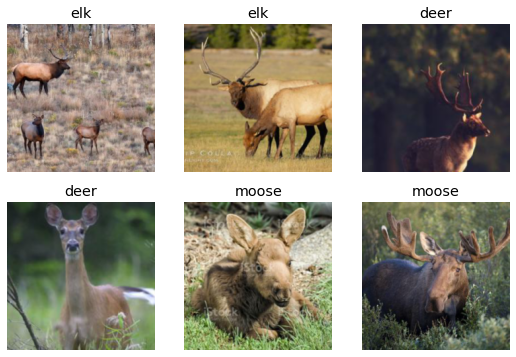

In [40]:
dls.valid.show_batch(max_n=6, nrows=2)

In [41]:
learn = vision_learner(dls, models.resnet18, metrics=error_rate)
learn.fine_tune(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.652962,0.517863,0.198276,00:06


epoch,train_loss,valid_loss,error_rate,time
0,0.515008,0.436487,0.172414,00:06
1,0.408703,0.397987,0.137931,00:07
2,0.314333,0.341825,0.112069,00:06
3,0.263161,0.320253,0.120690,00:07


In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [ ]:
interp.plot_top_losses(6, nrows=1)

In [ ]:
cleaner = ImageClassifierCleaner(learn)
cleaner

In [ ]:
for idx in cleaner.delete():
    #cleaner.fns[idx].unlink()
    
for idx,cat in cleaner.change(): 
    #shutil.move(str(cleaner.fns[idx]), path/cat)

In [ ]:
learn = vision_learner(dls, resnet34, metrics=error_rate)
learn.fine_tune(5)

In [ ]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [48]:
learn.path = Path('.')
learn.export('new_model.pkl')

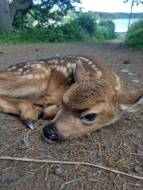

In [24]:
from fastdownload import download_url
urls = search_images_ddg('deer')
urls[1]
download_url(urls[1], 'deer.jpg')

im = Image.open('deer.jpg')
im.to_thumb(190,190)

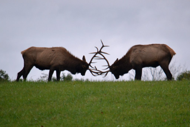

In [25]:
urls = search_images_ddg('elk')
urls[0]
download_url(urls[0], 'elk.jpg')

im = Image.open('elk.jpg')
im.to_thumb(190,190)

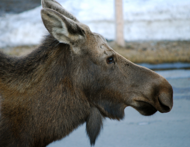

In [26]:
urls = search_images_ddg('moose')
urls[1]
download_url(urls[1], 'moose.jpg')

im = Image.open('moose.jpg')
im.to_thumb(190,190)

In [21]:
! pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.3/5.3 MB 34.1 MB/s eta 0:00:0000:0100:01
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 84.8/84.8 kB 7.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.9/54.9 kB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.3/2.3 MB 47.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 212.9/212.9 kB 15.6 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 68.4/68.4 kB 4.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 856.7/856.7 kB 39.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 593.7/593.7 kB 26.1 MB/s eta 0:00:00
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4712 sha256=da61b893b952c488f782b617658551b2bd8336c67b4553d73f2372ed1d14b95a
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created whe

In [ ]:
im = PILImage.create("elk.jpg")
im.thumbnail((192, 192))
im

In [52]:
from fastai.vision.all import *
import gradio as gr

learn = load_learner('new_model.pkl')
categories = learn.dls.vocab

def classify_image(img):
    img = PILImage.create(img)
    pred, idx, probs = learn.predict(img)
    return dict(zip(categories, map(float,probs)))


In [ ]:
classify_image(im)

In [54]:
image = gr.inputs.Image(shape=(192,192))
label = gr.outputs.Label()
examples = ['deer.jpg', 'elk.jpg', 'moose.jpg']

intf = gr.Interface(fn=classify_image, inputs=image, outputs=label, examples=examples)
intf.launch(inline=False, share=True)

/opt/conda/lib/python3.7/site-packages/gradio/inputs.py:257: UserWarning: Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components
  "Usage of gradio.inputs is deprecated, and will not be supported in the future, please import your component from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: `optional` parameter is deprecated, and it has no effect
  warnings.warn(value)
/opt/conda/lib/python3.7/site-packages/gradio/outputs.py:197: UserWarning: Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components
  "Usage of gradio.outputs is deprecated, and will not be supported in the future, please import your components from gradio.components",
/opt/conda/lib/python3.7/site-packages/gradio/deprecation.py:40: UserWarning: The 'type' parameter has been deprecated. Use the Number component instead.
 

Running on local URL:  http://127.0.0.1:7863
Running on public URL: https://22892.gradio.app

This share link expires in 72 hours. For free permanent hosting, check out Spaces: https://huggingface.co/spaces


(<gradio.routes.App at 0x7fa188e25110>,
 'http://127.0.0.1:7863/',
 'https://22892.gradio.app')